In [79]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [35]:
df = pd.read_csv('../data/united_data.csv', index_col=0)

## First let's try some models excluding rows containing nan values

In [23]:
X = df.dropna().drop('Corn_Yield', axis=1)
y = df.dropna()['Corn_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Linear regression is too simple, performs poorly on the data

In [24]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-7.914700912584371e+23

In [27]:
mean_squared_error(y_test, reg.predict(X_test))

1.733379353544957e+27

#### Multilayer Perceptron seems to perform better, we do a cross-validation and get a mean score of 0.85, with a mean-squared error of 496

In [29]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.7731336875908982

In [34]:
mean_squared_error(y_test, reg.predict(X_test))

496.8543805863304

In [33]:
cross_val_score(reg, X, y, cv=5).mean()

0.8517745119014897

## Lets try a models that can work with nan values

In [36]:
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [38]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [39]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

227.550426420556

In [7]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9714351117557671

In [40]:
cross_val_score(reg, X, y, cv=5).mean()

0.9002835791090849

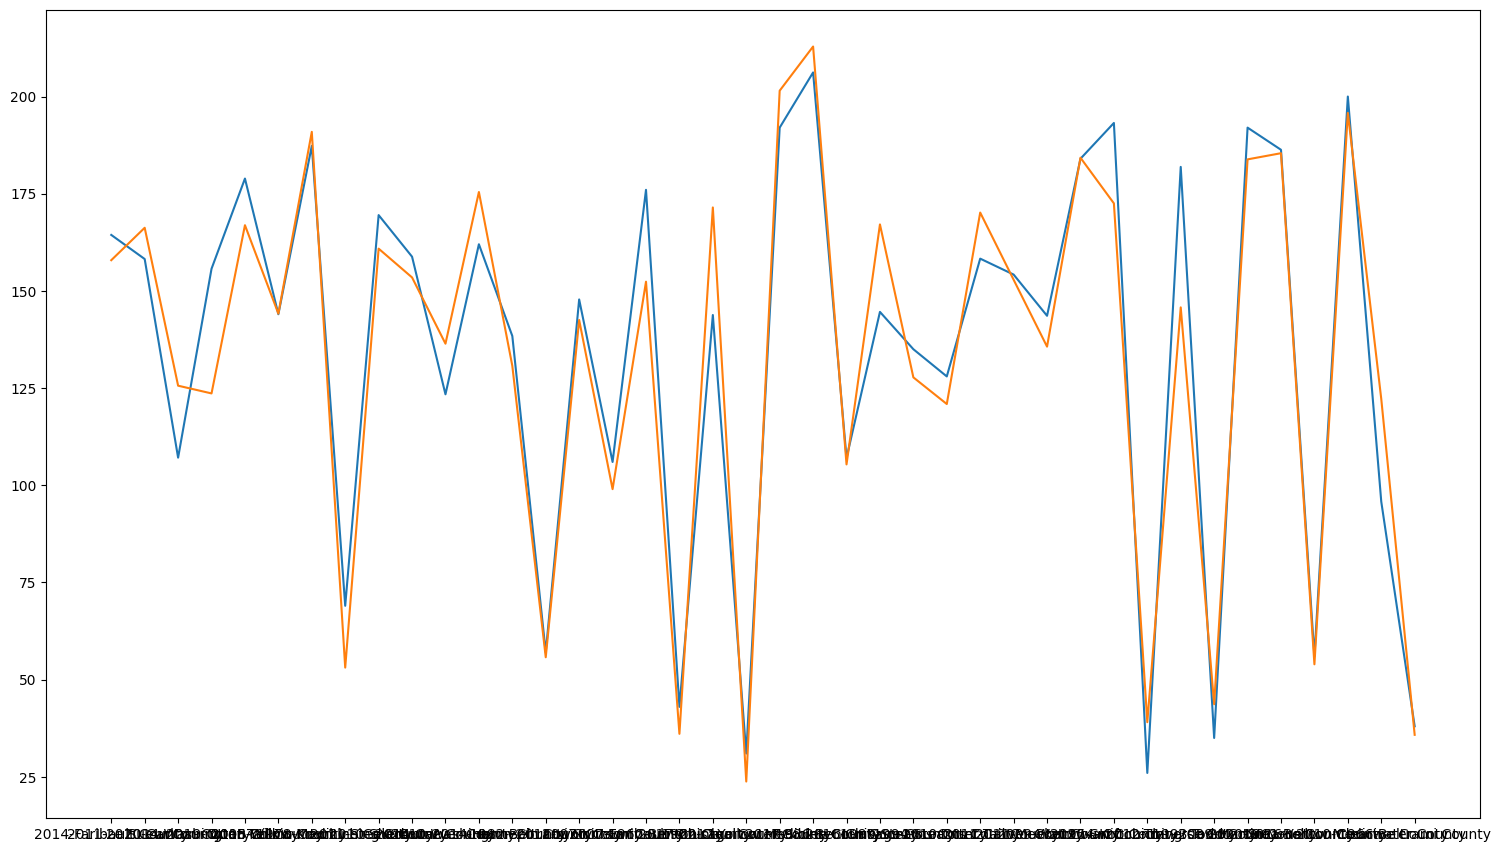

In [41]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [82]:
from lightgbm import LGBMRegressor, plot_importance

In [54]:
reg = LGBMRegressor().fit(X_train, y_train)

In [55]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

211.58452389617875

In [45]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9731414953670467

In [81]:
fi = reg.feature_importances_
np.argwhere(fi > 15)
columns[np.argwhere(fi > 10)]

array([['01-31-min'],
       ['02-23-min'],
       ['03-14-max'],
       ['03-16-min'],
       ['05-16-min'],
       ['05-25-min'],
       ['06-10-min'],
       ['06-11-min'],
       ['06-21-avg'],
       ['06-21-min'],
       ['07-04-avg'],
       ['07-05-min'],
       ['07-08-min'],
       ['07-09-avg'],
       ['07-11-min'],
       ['07-24-max'],
       ['07-26-avg'],
       ['07-26-min'],
       ['08-05-avg'],
       ['08-13-prec'],
       ['08-17-avg'],
       ['08-23-avg'],
       ['08-23-min'],
       ['09-06-max'],
       ['09-12-min'],
       ['09-15-min'],
       ['09-16-prec'],
       ['09-21-avg'],
       ['09-23-avg'],
       ['09-24-avg']], dtype='<U10')

In [46]:
cross_val_score(reg, X, y, cv=5).mean()

0.8990104690710894

In [14]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([104.11670451,  91.48299961, 113.21838351, 131.53536779,
       144.24777163, 105.83118416, 126.40218396, 140.50460566,
       104.39057452, 137.15099623, 128.03177188, 145.49904436,
       106.408852  , 150.90179636, 160.34285337, 121.30853824,
       109.158402  ])

In [84]:
res.mean()

124.73717822252678

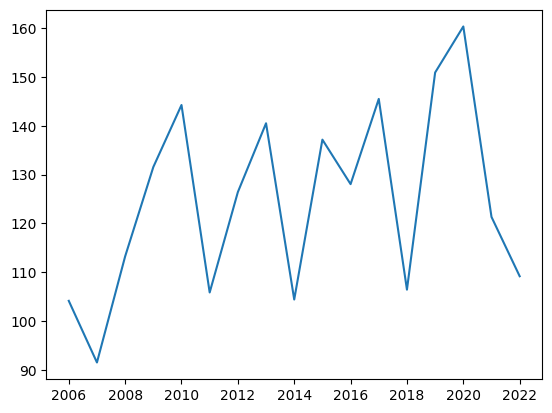

In [15]:
plt.plot( range(2006,2023), res)

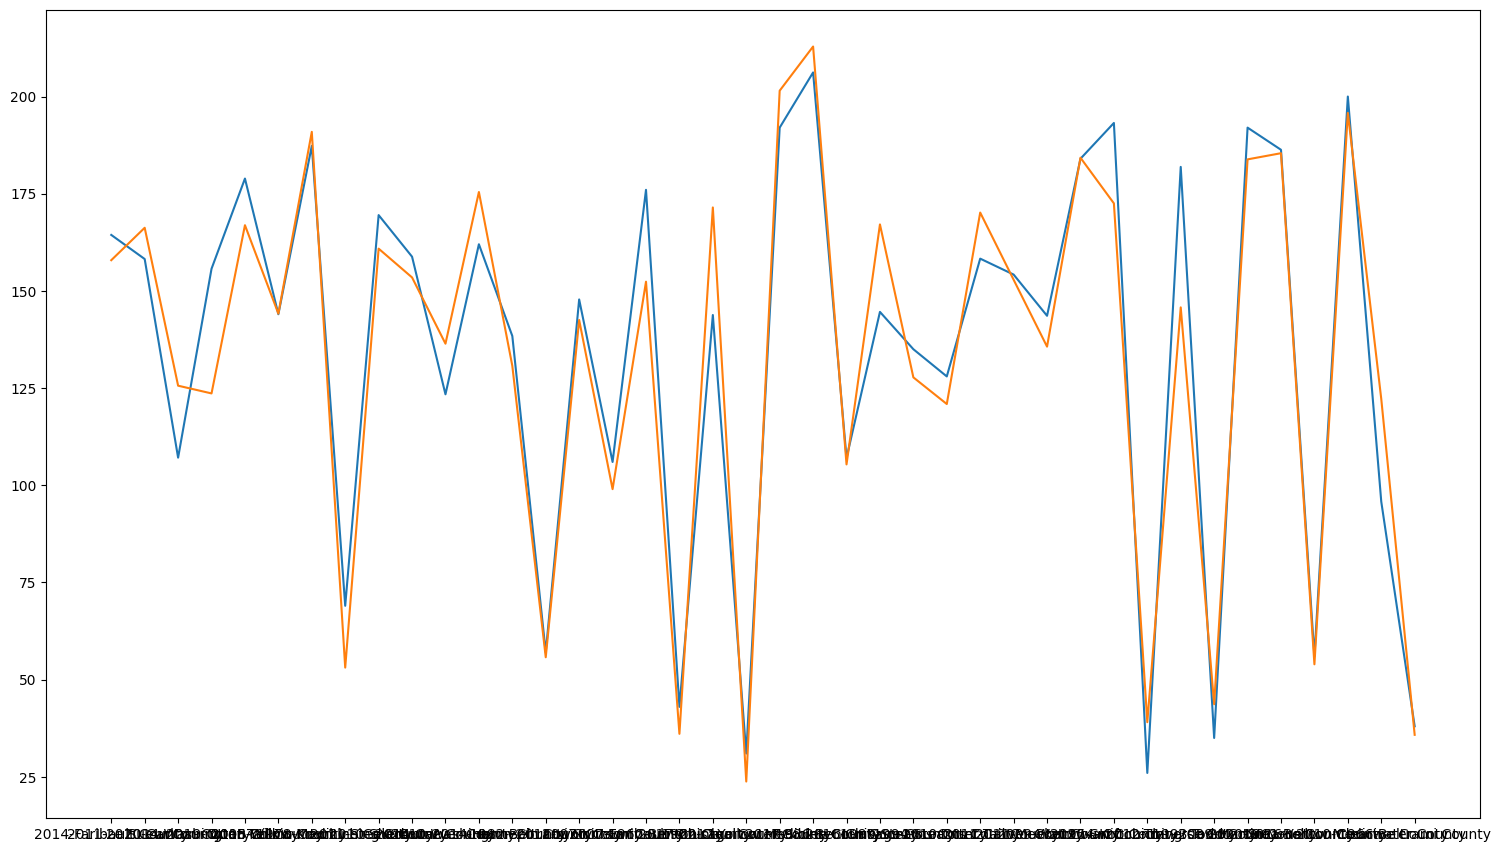

In [16]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)